In [1]:
import pandas as pd
import glob
from datetime import datetime, timedelta

In [63]:
labels = pd.read_csv("/media/chan/backup_SSD2/ASPED.c/Session_12032024/Path1/Labels/12-03-camP1.csv")

print(labels.shape)
labels.head()

(111310, 18)


,timestamp,frame,recorder1_1m,recorder2_1m,recorder1_3m,recorder2_3m,recorder1_6m,recorder2_6m,recorder1_9m,recorder2_9m,view_recorder1_1m,view_recorder2_1m,view_recorder1_3m,view_recorder2_3m,view_recorder1_6m,view_recorder2_6m,view_recorder1_9m,view_recorder2_9m
0,2024-12-03 14:57:16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-12-03 14:57:17,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
2,2024-12-03 14:57:18,2,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0
3,2024-12-03 14:57:19,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2024-12-03 14:57:20,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [66]:
import pandas as pd
import glob
import os

folder_path = "/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows" 
file_list = sorted(glob.glob(os.path.join(folder_path, "GH*full_pedestrian_flow.csv")))
print(file_list)
dfs = []

# Iterate over the files
for idx, file in enumerate(file_list):

    df = pd.read_csv(file)
    
    # Remove the first 40 rows only for the first file
    # if idx == 0:
    #     df = df.iloc[18:]
    
    dfs.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dfs, ignore_index=True)

#merged_df.to_csv(os.path.join(folder_path, "Session_02152024_Path1_pedestrian_flow.csv"), index=False)

# Display the first few rows
print(merged_df.head())
print(merged_df.shape)



['/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH010013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH020013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH030013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH040013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH050013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH060013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH070013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH080013full_pedestrian_flow.csv', '/home/schivilkar/dev/final_video_processing/Session_12032024/Path1/FinalFlows/GH090013

In [51]:
merged_df.columns

Index(['Frame', 'Total_Detections', 'Total_Tracked', 'Zone_A_Count',
       'Zone_B_Count', 'A_to_B', 'B_to_A', 'Total_A_to_B', 'Total_B_to_A'],
      dtype='object')

In [54]:
flow_last_cols = merged_df.iloc[:, -4:]

final_flow = pd.concat([labels, flow_last_cols], axis=1)
final_flow.to_csv(os.path.join(folder_path, "Session_10292024_Path1_pedestrian_flow.csv"), index=False)


In [55]:
print(final_flow.head())
print(final_flow.columns)

             timestamp  frame  recorder1_1m  recorder2_1m  recorder1_3m  \
0  2024-10-29 10:21:00      0             0             0             0   
1  2024-10-29 10:21:01      1             0             0             0   
2  2024-10-29 10:21:02      2             0             0             0   
3  2024-10-29 10:21:03      3             0             0             0   
4  2024-10-29 10:21:04      4             0             0             0   

   recorder2_3m  recorder1_6m  recorder2_6m  recorder1_9m  recorder2_9m  ...  \
0             0             0             0             0             0  ...   
1             0             1             0             1             1  ...   
2             0             0             0             0             0  ...   
3             0             0             0             0             0  ...   
4             0             0             0             0             0  ...   

   view_recorder1_3m  view_recorder2_3m  view_recorder1_6m  view_rec

In [56]:
import matplotlib.pyplot as plt

final_flow['timestamp'] = pd.to_datetime(final_flow['timestamp'], format='%Y-%m-%d %H:%M:%S')
final_flow['hour_of_day'] = final_flow['timestamp'].dt.hour

In [57]:
flow_by_hour = final_flow.groupby('hour_of_day').agg({
    'A_to_B': 'sum',
    'B_to_A': 'sum'
}).reset_index()

# Add a column for the total flow
flow_by_hour['Total_FlowAB'] = flow_by_hour['A_to_B'] + flow_by_hour['B_to_A']

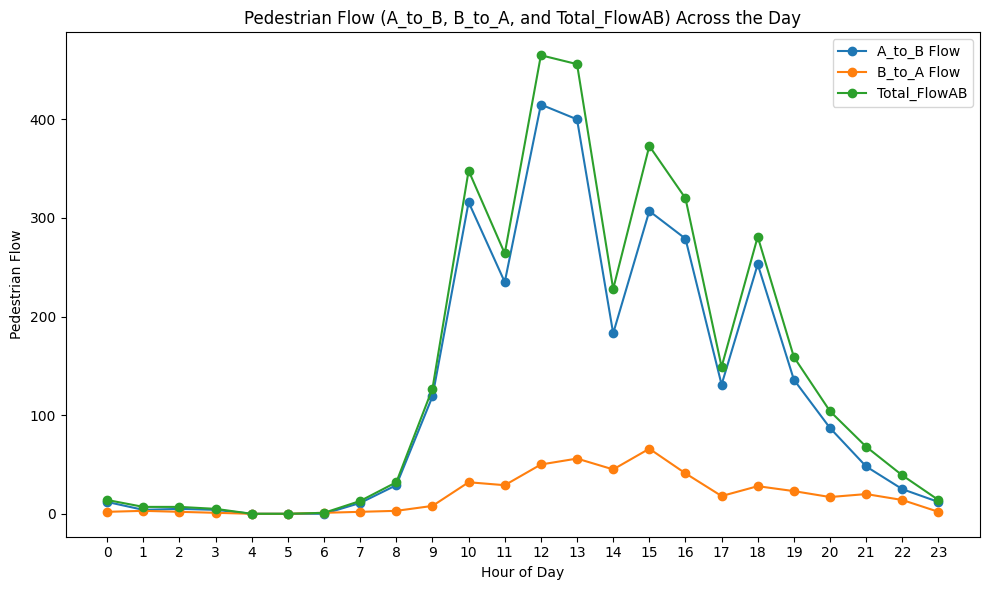

In [58]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['A_to_B'], label='A_to_B Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['B_to_A'], label='B_to_A Flow', marker='o')
plt.plot(flow_by_hour['hour_of_day'], flow_by_hour['Total_FlowAB'], label='Total_FlowAB', marker='o')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Pedestrian Flow')
plt.title('Pedestrian Flow (A_to_B, B_to_A, and Total_FlowAB) Across the Day')
plt.xticks(range(0, 24))  # Set x-axis ticks for each hour (0-23)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [62]:
peak_hours = flow_by_hour.set_index("hour_of_day").idxmax()
off_peak_hours = flow_by_hour.set_index("hour_of_day").idxmin()

peak_offpeak_df = pd.DataFrame({
    "Peak Hour": peak_hours,
    "Off-Peak Hour": off_peak_hours
})

# Print the table
print(peak_offpeak_df)


              Peak Hour  Off-Peak Hour
A_to_B               12              4
B_to_A               15              4
Total_FlowAB         12              4
AB_ratio              9              4


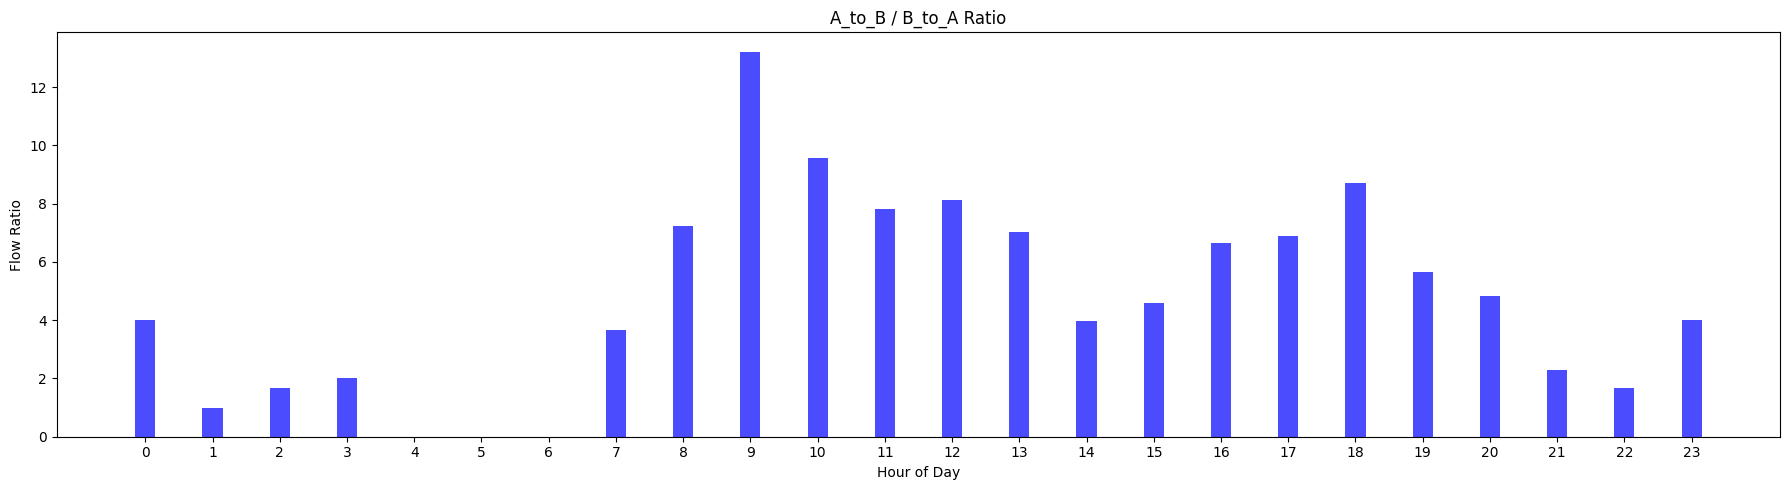

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Compute directional flow ratios
flow_by_hour['AB_ratio'] = flow_by_hour['A_to_B'] / (flow_by_hour['B_to_A'] + 1) 

# Set up bar width and positions
x = np.arange(len(flow_by_hour['hour_of_day']))  # X-axis positions
bar_width = 0.3  # Width of bars

# Create a figure with 1 row and 3 subplots horizontally
fig, axes = plt.subplots(1, 1, figsize=(18, 5), sharey=True)

# Bar Plot for AC Ratio
axes.bar(flow_by_hour['hour_of_day'], flow_by_hour['AB_ratio'], color='blue', alpha=0.7, width=bar_width)
axes.set_title("A_to_B / B_to_A Ratio")
axes.set_xlabel("Hour of Day")
axes.set_ylabel("Flow Ratio")
axes.set_xticks(range(0, 24)) 


# Adjust layout
plt.tight_layout()
plt.show()


          A_to_B    B_to_A
A_to_B  1.000000  0.914782
B_to_A  0.914782  1.000000


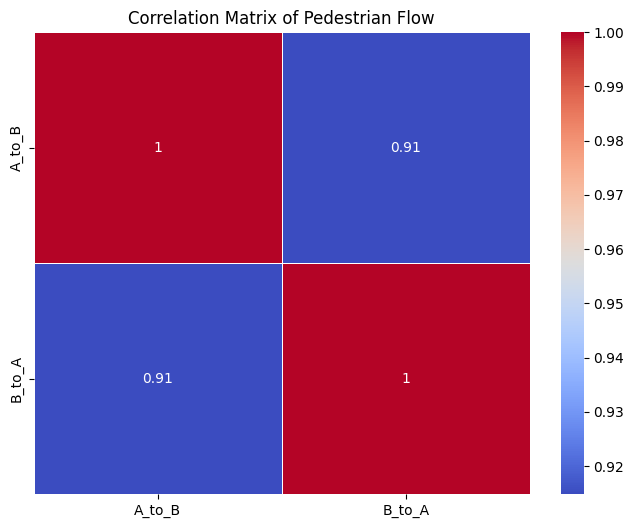

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['A_to_B', 'B_to_A']
correlation_matrix = flow_by_hour[selected_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Pedestrian Flow")
plt.show()
